In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Nissan LEAF Battery Survey Data
##### Plug In America's LEAF Owner Survey
The Nissan LEAF comes with an 8-year or 100,000 mile warranty on the battery pack. However, we've been told to expect some loss of capacity over time. At least a few LEAF owners in hot climates have experienced more capacity loss than expected, but many others are not seeing any noticeable loss. Owners, and potential owners, are understandably curious to know what is the typical experience like? What factors influence battery health?

In [2]:
surveys = pd.read_csv('../data/leaf.txt', sep='\t', lineterminator='\n')
surveys

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,...,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments
0,1264,622,09/18/2019 21:27,2015,LEAF SV,United States,2/2015,2/2018,t,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1269,623,11/30/2019 06:17,2018,LEAF SV,United States,3/2018,5/2018,t,VT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1274,624,03/03/2020 12:21,2018,LEAF S,United States,8/2018,9/2018,t,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1275,625,03/03/2020 13:17,2014,LEAF SV,United States,1/2014,3/2014,f,NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325,626,08/18/2021 19:59,2012,LEAF SV,United States,4/2012,9/2019,t,CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,1273,612,02/26/2020 18:27,2018,LEAF SL,United States,8/2018,9/2018,t,DE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,1321,651,02/28/2021 16:45,2014,LEAF SL Plus,Norway,3/2014,1/2021,t,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,1322,551,06/18/2021 15:04,2011,LEAF SL,United States,10/2010,10/2014,t,CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,1327,652,12/25/2021 08:57,2019,LEAF S,United States,3/2019,7/2019,t,HI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not sure what a Nissan Battery Report is.


In [3]:
surveys.keys()

Index(['report_id', 'vehicle_id', 'date_submit', 'model_year', 'model',
       'country', 'date_built', 'date_acquired', 'qc_port', 'state', 'city',
       'postal_code', 'odometer', 'unit_distance', 'capacity_bars',
       'perceived_range', 'perceived_range_text', 'soc_meter', 'gids_80',
       'gids_100', 'ah_pack', 'soh', 'hx', 'bar_11_date', 'bar_11_odometer',
       'bar_10_date', 'bar_10_odometer', 'bar_9_date', 'bar_9_odometer',
       'bar_8_date', 'bar_8_odometer', 'bar_7_date', 'bar_7_odometer',
       'batt_swapped', 'batt_swap_count', 'batt_swap_warranty',
       'dist_batt_swap', 'date_batt_swap', 'bars_batt_swap', 'gids_batt_swap',
       'ah_batt_swap', 'soh_batt_swap', 'charge_method', 'charge_method_text',
       'range_charge_frequency', 'range_charge_frequency_text',
       'standard_charge_frequency', 'standard_charge_frequency_text',
       'topoff_charge_frequency', 'parked_charge_frequency', 'qc_count',
       'drive_frequency', 'trip_distance', 'elevation_gain'

In [4]:
surveys.dtypes.head(50)

report_id                           int64
vehicle_id                          int64
date_submit                        object
model_year                          int64
model                              object
country                            object
date_built                         object
date_acquired                      object
qc_port                            object
state                              object
city                               object
postal_code                        object
odometer                            int64
unit_distance                      object
capacity_bars                       int64
perceived_range                     int64
perceived_range_text               object
soc_meter                          object
gids_80                           float64
gids_100                          float64
ah_pack                           float64
soh                               float64
hx                                float64
bar_11_date                       

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 650)

### Exploratory Analysis
#### Looking at bars and mileage to determine battery degradation
#### 12 Capacity bars is full/ initial capacity

In [85]:
surveys.vehicle_id.nunique()

647

In [6]:
surveys.describe()

,report_id,vehicle_id,model_year,odometer,capacity_bars,perceived_range,gids_80,gids_100,ah_pack,soh,hx,bar_11_odometer,bar_10_odometer,bar_9_odometer,bar_8_odometer,bar_7_odometer,batt_swap_count,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,range_charge_frequency,standard_charge_frequency,topoff_charge_frequency,parked_charge_frequency,qc_count,drive_frequency,trip_distance,elevation_gain,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,73.000000,159.000000,168.00000,156.000000,150.000000,165.000000,70.000000,38.000000,23.000000,7.000000,18.000000,17.000000,8.000000,8.000000,8.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,455.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,370.000000,368.000000,337.000000,337.000000,341.000000,331.000000,25.0,17.000000,16.0,105.000000,103.000000,94.000000,169.000000,172.000000,155.000000,104.000000,107.000000,98.000000,85.000000,89.000000,83.000000,35.000000,34.000000,33.000000,25.000000,25.000000,24.000000,12.000000,13.000000,10.000000
mean,716.556414,327.962906,2012.098918,26867.299845,11.341577,3.228748,204.945205,246.654088,57.16688,83.815385,74.823333,28466.612121,35230.028571,47332.078947,62073.086957,80771.285714,1.055556,8.176471,192.500000,43.177512,62.500000,1.965997,4.853168,5.111283,7.680062,7.630603,21.253478,2.369397,36.517774,361.492308,42.255023,63.729521,31.145286,0.894900,0.202473,1.480680,0.924266,6.391892,2013.532609,4.842730,4.738872,4.868035,4.812689,0.0,0.294118,0.0,5469.144762,4.699029,1038.048936,9318.221893,4.866279,1845.083226,10072.911538,4.902336,2171.919490,6968.794235,24.014831,1349.662651,9897.221429,57.263235,1875.224242,7684.992400,4.748000,1408.046667,6126.264167,4.392308,1619.397000
std,393.697232,188.575986,1.625869,23575.240850,1.158834,1.235533,41.062923,69.751456,17.54054,11.513802,18.587493,19430.496927,25365.703337,24124.017351,31739.039620,35098.742830,0.235702,0.727607,43.749286,3.953142,10.042766,0.587870,2.654236,2.693872,2.247383,2.286965,55.172267,0.654484,23.993083,469.555038,29.493425,12.567075,93.913061,3.568189,0.787358,1.302242,0.689695,3.248588,1.813970,0.665172,0.753999,0.644117,0.806013,0.0,1.212678,0.0,8896.448061,1.841435,1481.228646,27240.108097,1.563854,4120.344771,18124.400386,1.734940,3069.498723,6230.295197,176.544350,1059.373992,9685.917230,306.170853,1530.552120,8083.687898,0.968728,1258.754401,4520.223648,1.041202,924.565626
min,6.000000,1.000000,2011.000000,181.000000,3.000000,1.000000,105.000000,86.000000,15.20000,34.780000,26.370000,663.000000,663.000000,786.000000,26666.000000,43200.000000,1.000000,7.000000,149.000000,36.130000,44.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,3.700000,64.000000,830.000000,3.200000,386.100000
25%,354.000000,164.500000,2011.000000,10958.500000,11.000000,2.000000,189.000000,220.000000,51.11250,78.042500,62.625000,16500.000000,21685.000000,37250.000000,42700.000000,56500.000000,1.000000,8.000000,176.250000,42.730000,61.750000,2.000000,3.000000,3.000000,6.000000,6.000000,0.000000,2.000000,20.000000,30.000000,10.000000,60.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2012.00000

Understanding the model year ranges

In [86]:
LEAF_year = surveys['model_year'].value_counts().reset_index()
LEAF_year.columns = ['Model Year', 'Customer Reports']
LEAF_year['Percentage'] = 100 * LEAF_year['Customer Reports']  / LEAF_year['Customer Reports'].sum()
LEAF_year

,Model Year,Customer Reports,Percentage
0,2011,324,50.077280
1,2012,158,24.420402
2,2013,80,12.364760
3,2015,29,4.482226
4,2014,21,3.245750
5,2016,17,2.627512
6,2018,9,1.391036
7,2019,6,0.927357
8,2017,3,0.463679


#### Half of all survey participants reported on their 2011 LEAFs built from late 2010, and a quarter on 2012 model year,  so almost 75% of 11-10 year old vehicles. That's a great sample of older models to analyze battery degradation

In [90]:
LEAF_year.to_csv('../data/leaf_year.csv', index = False)

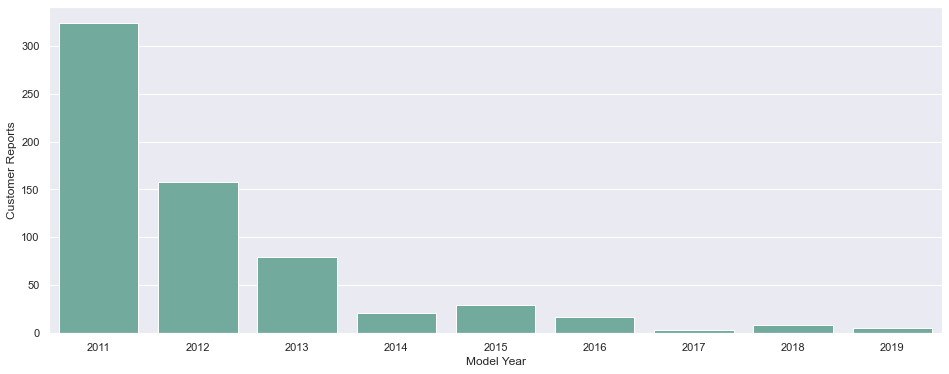

In [89]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
sns.barplot(x='Model Year',
            y='Customer Reports',
            data=LEAF_year, 
            estimator=sum, 
            ci=None, 
            color='#69b3a2'
            );

In [94]:
surveys.groupby(['state', 'capacity_bars'])['bar_11_odometer'].mean()

state  capacity_bars
AL     11               22797.000000
       12                        NaN
AR     12                        NaN
AZ     7                         NaN
       8                  663.000000
       9                 9651.500000
       10                9723.200000
       11               21304.000000
       12                        NaN
BC     8                19133.000000
       11               75946.000000
       12                        NaN
CA     7                24250.000000
       8                35758.400000
       9                25051.000000
       10               36356.866667
       11               26337.473684
       12               18602.000000
CO     11               21000.000000
       12                        NaN
CT     10                        NaN
       12                        NaN
DE     12                        NaN
FL     6                         NaN
       10               16571.500000
       11               17106.000000
       12        

In [97]:
surveys.state.value_counts()

CA    222
WA     82
AZ     29
FL     25
TX     24
OR     24
HI     16
GA     15
VA     14
NC     13
TN     13
CO     11
MN     10
NY      9
IL      9
WI      8
NV      7
ON      7
MA      7
BC      7
IN      6
PA      5
MD      5
UT      5
MO      5
CT      4
OH      4
SC      4
ME      3
VT      3
AL      3
QC      2
KS      2
MI      2
IA      2
ID      2
MB      2
NH      1
NB      1
NJ      1
NM      1
AR      1
WY      1
NE      1
LA      1
DE      1
Name: state, dtype: int64

#### How does range change over the first few years of car ownership?
#### The lowest capacity bar mileage reported is bar 7. That means a 45% reduction of initial range

In [106]:
surveys.loc[surveys['state'] == 'CA'].bar_7_odometer.mean()

80480.0

In [87]:
LEAF_by_country = surveys['country'].value_counts().reset_index()
LEAF_by_country.columns = ['Country', 'Customer Reports']
LEAF_by_country['Percentage'] = 100 * LEAF_by_country['Customer Reports']  / LEAF_by_country['Customer Reports'].sum()
LEAF_by_country

,Country,Customer Reports,Percentage
0,United States,601,92.890263
1,Canada,19,2.936631
2,Norway,10,1.545595
3,Denmark,3,0.463679
4,Spain,3,0.463679
5,United Kingdom,2,0.309119
6,Sweden,2,0.309119
7,Germany,2,0.309119
8,Estonia,2,0.309119
9,Portugal,1,0.154560


In [13]:
surveys.unit_distance.value_counts()

mi    600
km     47
Name: unit_distance, dtype: int64

In [14]:
surveys[surveys['unit_distance'] == 'km'].odometer.describe()

count        47.000000
mean      56859.191489
std       37333.440795
min        4412.000000
25%       26107.000000
50%       50221.000000
75%       78931.000000
max      154617.000000
Name: odometer, dtype: float64

In [15]:
surveys_usa = surveys[surveys['unit_distance'] == 'mi']

In [16]:
surveys_usa.describe()

,report_id,vehicle_id,model_year,odometer,capacity_bars,perceived_range,gids_80,gids_100,ah_pack,soh,hx,bar_11_odometer,bar_10_odometer,bar_9_odometer,bar_8_odometer,bar_7_odometer,batt_swap_count,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,range_charge_frequency,standard_charge_frequency,topoff_charge_frequency,parked_charge_frequency,qc_count,drive_frequency,trip_distance,elevation_gain,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,62.000000,142.000000,141.000000,129.000000,124.000000,157.000000,66.000000,36.000000,21.000000,7.000000,18.000000,17.000000,8.000000,8.000000,8.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,414.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,338.000000,336.000000,308.000000,309.000000,313.000000,304.00000,24.0,16.0000,15.0,100.000000,98.000000,89.000000,161.000000,164.000000,147.000000,94.000000,98.000000,89.000000,72.000000,77.000000,70.000000,24.00000,24.000000,22.000000,21.000000,21.000000,20.000000,11.000000,12.000000,9.000000
mean,698.426667,318.648333,2012.068333,24517.935000,11.326667,3.241667,202.806452,246.225352,56.681673,83.181008,73.884113,27116.636943,33330.287879,44902.388889,57778.238095,80771.285714,1.055556,8.176471,192.500000,43.177512,62.500000,1.973333,4.895000,5.111667,7.631667,7.625000,18.583333,2.378333,34.116667,383.101449,42.190000,61.325000,28.255000,0.778333,0.178333,1.505000,0.891667,6.343195,2013.446429,4.853896,4.744337,4.869010,4.81250,0.0,0.3125,0.0,4793.677000,4.526531,935.937079,7123.605590,4.651829,1530.522449,8090.047872,4.644898,1908.047303,5332.016667,4.593506,1155.250000,6467.30000,4.429167,1440.940909,6483.740952,4.442857,1280.241000,5409.015455,4.141667,1588.241111
std,394.466481,189.210683,1.624211,20402.405268,1.168574,1.244660,36.574128,72.533621,18.283419,11.560813,18.106094,18538.356123,24405.901664,20328.212413,25707.493715,35098.742830,0.235702,0.727607,43.749286,3.953142,10.042766,0.602684,2.646188,2.659760,2.242256,2.238167,52.629010,0.650052,19.698471,481.564741,29.407003,8.873779,91.408511,3.245523,0.688467,1.341507,0.673810,3.191322,1.799698,0.651796,0.749031,0.634554,0.80901,0.0,1.2500,0.0,3930.434887,1.482026,795.256022,4510.588628,0.970578,1111.989708,5181.406507,0.910661,1676.216830,4034.187257,0.964957,824.828654,4706.37913,1.235869,1023.533777,6395.500970,0.506529,1093.091393,3960.426816,0.540132,975.066172
min,6.000000,1.000000,2011.000000,181.000000,3.000000,1.000000,105.000000,86.000000,15.200000,34.780000,26.370000,663.000000,663.000000,786.000000,26666.000000,43200.000000,1.000000,7.000000,149.000000,36.130000,44.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,1.00000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,237.000000,3.700000,64.000000,830.000000,3.200000,386.100000
25%,328.500000,152.750000,2011.000000,10493.750000,11.000000,2.000000,189.250000,218.250000,50.560000,77.000000,61.057500,15200.000000,21514.750000,36750.000000,42000.000000,56500.000000,1.000000,8.000000,176.250000,42.730000,61.750000,2.000000,3.000000,3.000000,6.000000,6.000000,0.000000,2.000000,20.000000,50.000000,13.750000,60.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2012.000000,5.000000,5.000000,5.000000

In [17]:
surveys_usa[surveys_usa['capacity_bars'] == 12].odometer.mean() # Full capacity bars

17134.136597938144

In [182]:
surveys_usa['capacity_bars'].value_counts()

12    388
11    109
10     52
9      25
8      20
7       3
6       2
3       1
Name: capacity_bars, dtype: int64

In [144]:
bar_12_full = surveys_usa[surveys_usa['capacity_bars'] == 12] 
bar_12_full.odometer.describe()

count      388.000000
mean     17134.136598
std      13867.182520
min        181.000000
25%       7800.000000
50%      13971.000000
75%      22388.500000
max      90500.000000
Name: odometer, dtype: float64

In [145]:
bar_12_full.to_csv('../data/leaf_bar_12.csv', index = False)

In [20]:
bar_12_nosw = bar_12_full[bar_12_full['batt_swapped'] == 'f']
bar_12_nosw.odometer.describe()

count      153.000000
mean     20934.503268
std      14249.217211
min        389.000000
25%      10786.000000
50%      19000.000000
75%      29600.000000
max      80023.000000
Name: odometer, dtype: float64

### Average Nissan LEAF mileage by battery capacity bars 
#### How fast will the battery lose capacity? From full 12 bars to 11 bars: capacity_bars bar_11_date bar_11_odometer

LEAF Owner's Manual: First generation Nissan Leaf battery charge, battery capacity and vehicle range meter
his gauge indicates the amount of charge the battery is capable of storing. With age and usage, the battery charge capacity decreases. This gauge also decreases over time and battery usage.

#### Capacity Bar 11 : How many miles to lose the 1st capacity bar from full capacity at 12?  Look at bar_11_odometer

In [21]:
surveys['bar_11_odometer'].describe()

count       165.000000
mean      28466.612121
std       19430.496927
min         663.000000
25%       16500.000000
50%       24800.000000
75%       35000.000000
max      160500.000000
Name: bar_11_odometer, dtype: float64

In [22]:
# Find outliers using Interquartile Range (IQR) = 16500 - 35000
low_outliers = 16500-(1.5 * 18500)
print(low_outliers)
high_outliers = 35000 + (1.5 * 18500)
print(high_outliers)

-11250.0
62750.0


7


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


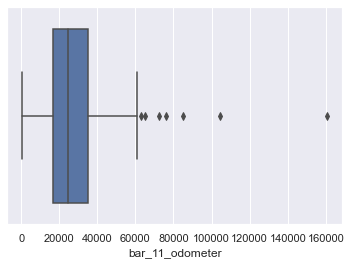

In [23]:
print(len(surveys.loc[(surveys.bar_11_odometer < -11250) | (surveys.bar_11_odometer > 62750)]))
sns.boxplot(surveys.bar_11_odometer);

In [24]:
len(surveys.loc[(surveys.bar_11_odometer > -11250) & (surveys.bar_11_odometer < 62750)])

158

In [25]:
len(surveys.loc[(surveys.bar_11_odometer > -11250)])

165

In [131]:
bar_11 = surveys.loc[(surveys.bar_11_odometer > -11250) & (surveys.bar_11_odometer < 62750)]
bar_11['bar_11_odometer'].mean()

25764.58860759494

In [132]:
bar_11

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,...,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments,bar_11_age,bar_10_age,bar_9_age,bar_8_age,bar_7_age,bar_12_age
3,1275,625,2020-03-03 13:17:00,2014,LEAF SV,United States,2014-01-01,2014-03-01,f,NC,Weaverville,28787,74910,mi,11,4,Noticeably less (5-10 miles) ...,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-13,60649.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),2,Daily,8,Never,6,5,...,3,40,0.0,ft,20,65,20,0,0,1,1,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1565 days,NaT,NaT,NaT,NaT,NaT
9,1283,630,2020-03-03 15:57:00,2012,LEAF SL,United States,2011-10-01,2012-01-01,t,CA,Redondo Beach,90277,38522,mi,8,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,2016-06-01,14000.0,2016-06-01,22000.0,NaT,NaN,NaT,NaN,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),10,A few times per year,5,Weekly,8,8,...,3,15,0.0,ft,10,50,20,0,0,1,1,Own,NaN,6.0,2017.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unable to access NissanConnect.,1613 days,1613 days,NaT,NaT,NaT,NaT
11,1285,632,2020-03-04 08:54:00,2016,LEAF SL,United States,2015-12-01,2016-05-01,t,AZ,Phoenix,85033,45000,mi,11,5,Significantly less (over 10 miles) ...,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-01,45000.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,t,2.0,t,"22,000",05/01/2018,8.0,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),2,Daily,8,Never,2,8,...,2,22,0.0,ft,50,80,0,0,0,5,1,Replaced it with a Volt,07/25/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1126 days,NaT,NaT,NaT,NaT,NaT
12,1286,633,2020-03-06 16:42:00,2011,LEAF SV,United States,2011-04-01,2011-05-01,t,WA,Bellevue,98006,50570,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,131.0,29.9500,64.07,41.83,2011-09-14,14000.0,2015-05-27,23000.0,2017-04-21,36000.0,2017-07-07,40200.0,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,About equal mix of 120V and 240V,9,Monthly,6,A few times per month,10,10,...,4,18,500.0,ft,1,55,0,0,0,1,1,Own,NaN,5.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Range bar is indicating 12. RANGE is 35 miles!...,136 days,1487 days,2182 days,2259 days,NaT,NaT
18,1296,639,2020-06-09 11:38:00,2017,LEAF S,United States,2016-10-01,2017-03-01,t,CA,Galt,95632,41835,mi,11,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,2019-12-31,36000.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),4,A few times per week,8,Never,10,4,...,3,50,0.0,ft,95,68,8,0,0,1,1,Own,NaN,NaN,NaN,NaN,NaN,N

In [133]:
bar_11.to_csv('../data/leaf_bar_11.csv', index = False)

#### Capacity Bar 10 : How many miles to capacity bar 10?  bar_10_odometer

In [27]:
surveys['bar_10_odometer'].mean()

35230.02857142857

In [28]:
# IQR = 21685 - 39483.75
low_outliers = 21685-(1.5 * 17798.75)
print(low_outliers)
high_outliers = 39483.75 + (1.5 * 17798.75)
print(high_outliers)

-5013.125
66181.875


4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


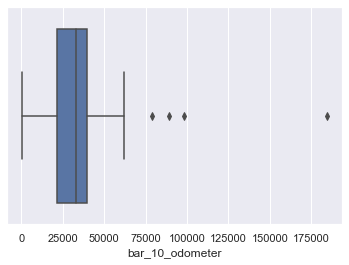

In [29]:
print(len(surveys.loc[(surveys.bar_10_odometer < -5013.125) | (surveys.bar_10_odometer > 66181.875)]))
sns.boxplot(surveys.bar_10_odometer);

In [30]:
len(surveys.loc[(surveys.bar_10_odometer > -5013.125) & (surveys.bar_10_odometer < 66181.875)])

66

In [31]:
len(surveys.loc[(surveys.bar_10_odometer > -5013.125)])

70

In [134]:
bar_10 = surveys.loc[(surveys.bar_10_odometer > -5013.125) & (surveys.bar_10_odometer < 66181.875)]
bar_10

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,...,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments,bar_11_age,bar_10_age,bar_9_age,bar_8_age,bar_7_age,bar_12_age
9,1283,630,2020-03-03 15:57:00,2012,LEAF SL,United States,2011-10-01,2012-01-01,t,CA,Redondo Beach,90277,38522,mi,8,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,2016-06-01,14000.0,2016-06-01,22000.0,NaT,NaN,NaT,NaN,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),10,A few times per year,5,Weekly,8,8,...,3,15,0.0,ft,10,50,20,0,0,1,1,Own,NaN,6.0,2017.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unable to access NissanConnect.,1613 days,1613 days,NaT,NaT,NaT,NaT
12,1286,633,2020-03-06 16:42:00,2011,LEAF SV,United States,2011-04-01,2011-05-01,t,WA,Bellevue,98006,50570,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,131.0,29.9500,64.07,41.83,2011-09-14,14000.0,2015-05-27,23000.0,2017-04-21,36000.0,2017-07-07,40200.0,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,About equal mix of 120V and 240V,9,Monthly,6,A few times per month,10,10,...,4,18,500.0,ft,1,55,0,0,0,1,1,Own,NaN,5.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Range bar is indicating 12. RANGE is 35 miles!...,136 days,1487 days,2182 days,2259 days,NaT,NaT
33,515,377,2013-08-10 08:22:00,2013,NaN,United States,2013-06-01,2013-07-01,t,AZ,Phoenix,85015,787,mi,8,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,2013-08-07,663.0,2013-08-07,663.0,2013-08-10,786.0,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Household outlet (110 to 120V),6,A few times per month,2,Daily,12,8,...,2,20,1200.0,ft,25,60,1,0,0,2,1,Lease,NaN,7.0,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,709.7,3.6,198.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STK #: DC410870 | VIN #: 1N4AZ0CP1DC410870, LO...",37 days,37 days,40 days,NaT,NaT,NaT
132,507,75,2013-07-22 13:40:00,2011,NaN,United States,2011-03-01,2011-05-01,t,AZ,Tucson,85710,21397,mi,10,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,2012-09-21,13146.0,2013-07-16,21397.0,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),6,A few times per month,3,Most days of the week,8,8,...,3,40,200.0,ft,0,0,3,0,0,1,1,Own,NaN,5.0,2013.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,509 days,807 days,NaT,NaT,NaT,NaT
316,516,378,2013-08-10 20:30:00,2011,NaN,United States,2011-06-01,2012-05-01,t,NV,Las Vegas,89131,17291,mi,10,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,2013-01-01,15000.0,2013-05-01,16500.0,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Household outlet (110 to 

In [33]:
bar_10.bar_10_odometer.mean()

30539.727272727272

In [135]:
bar_10.to_csv('../data/leaf_bar_10.csv', index = False)

#### Capacity Bar 9 : How fast will the battery lose capacity? bar_9_odometer

In [34]:
surveys['bar_9_odometer'].mean()

47332.07894736842

In [35]:
# IQR = 37250 - 54235.25
low_outliers = 37250-(1.5 * 16985.25)
print(low_outliers)
high_outliers = 54235.25 + (1.5 * 16985.25)
print(high_outliers)

11772.125
79713.125


4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


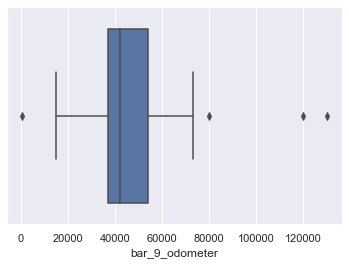

In [37]:
print(len(surveys.loc[(surveys.bar_9_odometer < 11772.125) | (surveys.bar_9_odometer > 79713.125)]))
sns.boxplot(surveys.bar_9_odometer);

In [136]:
bar_9 = surveys.loc[(surveys.bar_9_odometer > 11772.125) & (surveys.bar_9_odometer < 79713.125)]
bar_9.head()

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,...,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments,bar_11_age,bar_10_age,bar_9_age,bar_8_age,bar_7_age,bar_12_age
12,1286,633,2020-03-06 16:42:00,2011,LEAF SV,United States,2011-04-01,2011-05-01,t,WA,Bellevue,98006,50570,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,131.0,29.9500,64.07,41.83,2011-09-14,14000.0,2015-05-27,23000.0,2017-04-21,36000.0,2017-07-07,40200.0,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,About equal mix of 120V and 240V,9,Monthly,6,A few times per month,10,10,...,4,18,500.0,ft,1,55,0,0,0,1,1,Own,NaN,5.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Range bar is indicating 12. RANGE is 35 miles!...,136 days,1487 days,2182 days,2259 days,NaT,NaT
26,1309,648,2020-07-31 16:30:00,2012,LEAF SV,United States,2012-06-01,2019-02-01,t,VA,Hampton,23661,17277,mi,9,4,Noticeably less (5-10 miles) ...,t,NaN,173.0,38.8700,67.30,45.22,NaT,NaN,NaT,NaN,2020-02-01,15000.0,NaT,NaN,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),5,Weekly,10,A few times per year,9,9,...,3,15,25.0,ft,15,60,0,0,0,1,2,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,365 days,NaT,NaT,NaT
99,508,21,2013-07-22 18:16:00,2011,NaN,United States,2011-02-01,2011-03-01,f,TX,Arlington,76016,44293,mi,8,5,Significantly less (over 10 miles) ...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,2013-05-21,41792.0,2013-06-29,43520.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),3,Most days of the week,8,Never,11,12,...,2,56,NaN,ft,80,57,200,2,0,2,1,Lease,NaN,7.0,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lost my 4th bar at the end of June, now eligib...",NaT,NaT,812 days,851 days,NaT,NaT
343,666,342,2014-05-19 20:10:00,2011,NaN,United States,2011-02-01,2011-06-01,t,CA,Irvine,NaN,48808,mi,9,5,Significantly less (over 10 miles) ...,t,NaN,195.0,NaN,NaN,NaN,2013-05-20,33080.0,2013-08-30,37406.0,2014-05-19,48778.0,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),3,Most days of the week,6,A few times per month,6,10,...,2,60,700.0,ft,80,67,6,1,0,1,1,Own,NaN,5.0,2014.0,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719 days,821 days,1083 days,NaT,NaT,NaT
344,984,176,2015-06-20 14:11:00,2012,NaN,United States,2011-10-01,2012-11-01,t,TX,AUSTIN,78732,55500,mi,12,2,About the same ...,t,NaN,285.0,66.1414,101.00,NaN,NaT,22000.0,NaT,24000.0,2014-08-28,44357.0,NaT,NaN,NaT,NaN,t,1.0,t,"53,400",05/18/2015,8.0,180.0,43.0401,44.0,2,Level 2 Charging Station (208 to 240V),2,Daily,8,Never,

In [38]:
bar_9.bar_9_odometer.mean()

43171.55882352941

In [137]:
bar_9.to_csv('../data/leaf_bar_9.csv', index = False)

#### Capacity Bar 8 : How fast will the battery lose capacity? bar_8_odometer

In [39]:
surveys.bar_8_odometer.mean()

62073.086956521736

In [40]:
# IQR = 42700 - 68668
low_outliers = 42700 - (1.5 * 25968)
print(low_outliers)
high_outliers = 68668 + (1.5 * 25968)
print(high_outliers)

3748.0
107620.0


2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


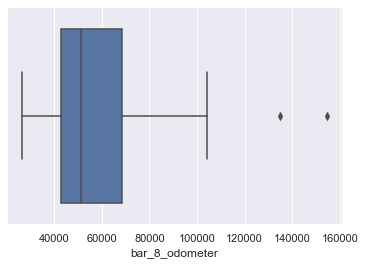

In [41]:
print(len(surveys.loc[(surveys.bar_8_odometer < 3748) | (surveys.bar_8_odometer > 107620)]))
sns.boxplot(surveys.bar_8_odometer);

In [138]:
bar_8 = surveys.loc[(surveys.bar_8_odometer > 3748) & (surveys.bar_8_odometer < 107620)]
bar_8.head()

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,...,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments,bar_11_age,bar_10_age,bar_9_age,bar_8_age,bar_7_age,bar_12_age
12,1286,633,2020-03-06 16:42:00,2011,LEAF SV,United States,2011-04-01,2011-05-01,t,WA,Bellevue,98006,50570,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,131.0,29.95,64.07,41.83,2011-09-14,14000.0,2015-05-27,23000.0,2017-04-21,36000.0,2017-07-07,40200.0,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,About equal mix of 120V and 240V,9,Monthly,6,A few times per month,10,10,...,4,18,500.0,ft,1,55,0,0,0,1,1,Own,NaN,5.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Range bar is indicating 12. RANGE is 35 miles!...,136 days,1487 days,2182 days,2259 days,NaT,NaT
99,508,21,2013-07-22 18:16:00,2011,NaN,United States,2011-02-01,2011-03-01,f,TX,Arlington,76016,44293,mi,8,5,Significantly less (over 10 miles) ...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,2013-05-21,41792.0,2013-06-29,43520.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),3,Most days of the week,8,Never,11,12,...,2,56,NaN,ft,80,57,200,2,0,2,1,Lease,NaN,7.0,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lost my 4th bar at the end of June, now eligib...",NaT,NaT,812 days,851 days,NaT,NaT
348,855,64,2014-07-16 06:49:00,2011,NaN,United States,2011-05-01,2011-06-01,t,TX,Midlothian,76065,58950,mi,12,1,Range has increased ...,t,221.0,272.0,65.92,100.00,101.43,2012-06-17,20200.0,2012-08-16,23652.0,2013-09-11,44733.0,2014-01-21,58078.0,NaT,NaN,t,1.0,t,"58,145",02/02/2014,8.0,184.0,43.34,66.0,2,Level 2 Charging Station (208 to 240V),1,More than once per day,8,Never,6,5,...,2,55,1149.0,ft,57,60,50,1,0,1,1,Own,NaN,7.0,2014.0,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,7745.0,5.1,1521.2,18700.5,4.9,3824.7,8591.8,4.7,1854.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This seemed to be the peak settling for my new...,382 days,442 days,833 days,965 days,NaT,NaT
365,1137,334,2017-02-27 20:46:00,2012,NaN,United States,2012-06-01,2012-11-01,t,TN,Tullahoma,37388,104101,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,175.0,NaN,NaN,NaN,2014-09-14,44800.0,2015-05-14,62000.0,2016-05-14,80000.0,2017-02-26,104074.0,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),1,More than once per day,8,Never,10,4,...,2,25,0.0,ft,10,64,600,2,2,1,1,Own,NaN,12.0,2013.0,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3168.0,4.0,790.7,25053.8,4.7,5385.4,12574.1,4.6,2724.4,18793.0,4.8,3914.0,19646.0,4.4,4428.0,NaN,NaN,NaN,With my 4th capacity bar gone & my range falli...,682 days,924 days,1290 days,1578 days,NaT,NaT
393,1133,59,2017-02-07 14:01:00,2011,NaN,United States,2011-04-01,2011-06-01,t,CA,Encinitas,92024,58600,mi,8,5,Sig

In [43]:
bar_8.bar_8_odometer.mean()

54196.71428571428

In [139]:
bar_8.to_csv('../data/leaf_bar_8.csv', index = False)

#### Capacity Bar 7 : How fast will the battery lose capacity? bar_7_odometer meaning driving range is less than 50% of new

In [44]:
surveys.bar_7_odometer.mean()

80771.28571428571

In [45]:
# IQR = 56500 - 96752.5
low_outliers = 56500 - (1.5 * 40252.5)
print(low_outliers)
high_outliers = 96752.5 + (1.5 * 40252.5)
print(high_outliers)

-3878.75
157131.25


0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


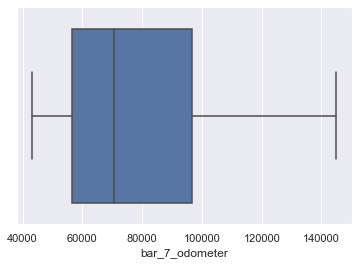

In [46]:
print(len(surveys.loc[(surveys.bar_7_odometer < -3878.75) | (surveys.bar_7_odometer > 157131.25)]))
sns.boxplot(surveys.bar_7_odometer);

In [140]:
bar_7 = surveys.loc[(surveys.bar_7_odometer > -3878.75) & (surveys.bar_7_odometer < 157131.25)]
bar_7.head()

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,...,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments,bar_11_age,bar_10_age,bar_9_age,bar_8_age,bar_7_age,bar_12_age
4,1325,626,2021-08-18 19:59:00,2012,LEAF SV,United States,2012-04-01,2019-09-01,t,CA,Los Angeles,90039,55760,mi,12,1,Range has increased ...,f,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,2020-02-25,53000.0,t,1.0,f,"55,260",08/09/2021,7.0,NaN,NaN,NaN,1,Household outlet (110 to 120V),5,Weekly,3,Most days of the week,6,8,...,3,15,50.0,ft,25,60,0,0,0,1,2,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,177 days,NaT
10,1284,631,2020-03-03 20:21:00,2011,LEAF SL,United States,2011-03-01,2011-05-01,t,CA,La Crescenta,91214-3424,151258,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,171.0,32.00,65.00,NaN,NaT,85000.0,NaT,98000.0,NaT,120000.0,NaT,135000.0,NaT,145000.0,t,1.0,f,"49,885",04/25/2016,9.0,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),1,More than once per day,3,Most days of the week,6,4,...,2,100,1500.0,ft,95,65,125,2,2,1,1,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011 pack was only charged 6 times a week 5 a...,NaT,NaT,NaT,NaT,NaT,NaT
417,1287,206,2020-03-06 19:44:00,2011,NaN,United States,2011-03-01,2011-05-01,t,CA,Carlsbad,92011,43850,mi,7,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,2014-02-06,16500.0,2015-02-12,23000.0,2016-10-09,29900.0,2018-04-06,36764.0,2020-01-11,43200.0,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),6,A few times per month,4,A few times per week,12,8,...,4,6,280.0,ft,0,63,10,0,0,1,1,Own,NaN,5.0,2017.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6042.0,6.0,1011.0,4539.0,5.9,771.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driving range is less than 50% of new.,1012 days,1383 days,1988 days,2532 days,3177 days,NaT
429,1278,41,2020-03-03 14:19:00,2011,LEAF SL,United States,2011-03-01,2011-05-01,t,CA,LosAngeles,91040,185583,mi,10,5,Significantly less (over 10 miles) ...,t,197.0,224.0,50.01,78.39,59.64,2018-08-31,160500.0,2020-02-15,184400.0,2014-05-28,73205.0,2014-12-09,86500.0,2015-01-20,101200.0,t,1.0,f,"104,237",02/28/2015,7.0,149.0,36.13,52.0,5,120/240V with frequent Quick Charging,4,A few times per week,10,A few times per year,11,12,...,3,35,1200.0,ft,90,55,1000,50,4,1,1,Own,NaN,6.0,2015.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,10978.0,5.6,1958.5,23619.0,6.0,3901.0,23000.0,6.2,3706.0,23941.0,6.3,3781.0,11367.0,6.2,1827.0,NaN,NaN,NaN,NaN,NaN,NaN,Add on Brusa charger controlled by LeafDD for ...,2679 days,3212 days,1123 days,1318 days,1360 days,NaT
586,1191,305,2018-05-01 12:38:00,2011,LEAF SL,United States,2011-03-01,2011-03-01,t,CA,sebastopol,95472,69700,mi,7,5,Significantl

In [141]:
bar_7.to_csv('../data/leaf_bar_7.csv', index = False)

Create bars and mileage DataFrame

In [48]:
bars_miles = pd.DataFrame(columns=['Battery Capacity Bars','Average Mileage'])

In [49]:
bars_miles['Battery Capacity Bars'] = ['12', '11', '10', '9', '8', '7']

In [50]:
bars_miles.loc[5, 'Average Mileage'] = bar_7.bar_7_odometer.mean()

In [51]:
bars_miles.loc[4, 'Average Mileage'] = bar_8.bar_8_odometer.mean()

In [52]:
bars_miles.loc[3, 'Average Mileage'] = bar_9.bar_9_odometer.mean()

In [53]:
bars_miles.loc[2, 'Average Mileage'] = bar_10.bar_10_odometer.mean()

In [54]:
bars_miles.loc[1, 'Average Mileage'] = bar_11['bar_11_odometer'].mean()

In [109]:
bars_miles.loc[0, 'Average Mileage'] = surveys_usa[surveys_usa['capacity_bars'] == 12].odometer.mean()

In [163]:
bars_miles['Average Mileage'] = bars_miles['Average Mileage'].apply(np.floor)
bars_miles

,Battery Capacity Bars,Average Mileage
0,12,17134
1,11,25764
2,10,30539
3,9,43171
4,8,54196
5,7,80771


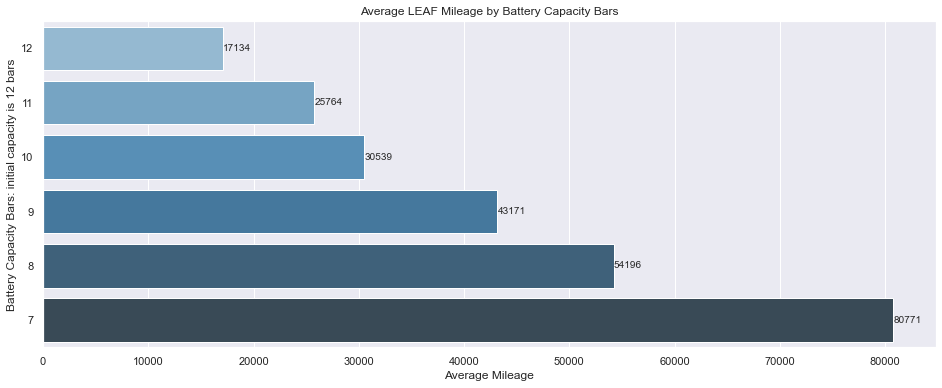

In [164]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='Average Mileage',
            y='Battery Capacity Bars',
            data=bars_miles, 
            estimator=sum, 
            ci=None, 
            palette="Blues_d"
            )
ax.bar_label(ax.containers[0], label_type='edge')
#ax.margins(y=0.1)
plt.xlabel('Average Mileage')
plt.ylabel('Battery Capacity Bars: initial capacity is 12 bars')
plt.title('Average LEAF Mileage by Battery Capacity Bars');

In [57]:
bars_miles.to_csv(index=False)

'Battery Capacity Bars,Average Mileage\r\n12,0\r\n11,25764.58860759494\r\n10,30539.727272727272\r\n9,43171.55882352941\r\n8,54196.71428571428\r\n7,80771.28571428571\r\n'

The capacity bars give a rough idea of the battery pack's capacity. 
The first of the 12 bars is lost when the pack has lost about 15% of its original capacity 
and thereafter bars represent about 7.5%.

### Average Nissan LEAF age by battery capacity bars 
#### Age of a Nissan LEAF for Various Battery Capacity Bars
    Changed column from object to datetime
    Added age column to calculate date from data vehicle was acquired and 1st driven to the reported capacity bar loss level

In [59]:
surveys['date_submit'] = pd.to_datetime(surveys['date_submit'])

In [113]:
bar_12_nosw.date_submit = pd.to_datetime(bar_12_nosw.date_submit)

C:\Users\VDMA Coder\AppData\Local\Temp\ipykernel_14372\2427670767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_12_nosw.date_submit = pd.to_datetime(bar_12_nosw.date_submit)


In [60]:
surveys['date_built'] = pd.to_datetime(surveys['date_built'])

In [61]:
surveys['date_acquired'] = pd.to_datetime(surveys['date_acquired'])

In [114]:
bar_12_nosw['date_acquired'] = pd.to_datetime(bar_12_nosw['date_acquired'])

C:\Users\VDMA Coder\AppData\Local\Temp\ipykernel_14372\3338554532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_12_nosw['date_acquired'] = pd.to_datetime(bar_12_nosw['date_acquired'])


In [62]:
surveys['bar_11_date'] = pd.to_datetime(surveys['bar_11_date'])

In [63]:
surveys['bar_10_date'] = pd.to_datetime(surveys['bar_10_date'])

In [64]:
surveys['bar_9_date'] = pd.to_datetime(surveys['bar_9_date'])

In [65]:
surveys['bar_8_date'] = pd.to_datetime(surveys['bar_8_date'])

In [66]:
surveys['bar_7_date'] = pd.to_datetime(surveys['bar_7_date'])

In [118]:
surveys['bar_12_age'] = (bar_12_nosw['date_submit']) - (bar_12_nosw['date_acquired'])
#surveys.bar_12_age.mean()
bar12age =surveys.bar_12_age.mean()/ pd.Timedelta('365 days')
bar12age = round(bar12age, 1)

#### Age of a Nissan LEAF when losing the 1st bar
### Average Years when the capacity drops to 11 Battery Capacity Bars

In [68]:
surveys['bar_11_age'] = (surveys['bar_11_date']) - (surveys['date_acquired'])
surveys.head()

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,qc_count,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments,bar_11_age
0,1264,622,2019-09-18 21:27:00,2015,LEAF SV,United States,2015-02-01,2018-02-01,t,WA,Burien,98166,47500,mi,12,3,A little less (a few miles) ...,f,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Household outlet (110 to 120V),4,A few times per week,8,Never,11,4,5,4,30,300.0,ft,80,50,2,0,0,1,2,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1269,623,2019-11-30 06:17:00,2018,LEAF SV,United States,2018-03-01,2018-05-01,t,VT,Essex Jct,05452,11666,mi,12,2,About the same ...,f,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),5,Weekly,8,Never,8,10,7,3,15,300.0,ft,10,65,5,0,0,1,1,Own,NaN,4.0,2019.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1274,624,2020-03-03 12:21:00,2018,LEAF S,United States,2018-08-01,2018-09-01,t,MA,Billerica,01821,11843,mi,12,2,About the same ...,f,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),9,Monthly,8,Never,8,8,15,4,50,500.0,ft,80,65,3,0,0,1,1,Own,NaN,9.0,2019.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1275,625,2020-03-03 13:17:00,2014,LEAF SV,United States,2014-01-01,2014-03-01,f,NC,Weaverville,28787,74910,mi,11,4,Noticeably less (5-10 miles) ...,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-13,60649.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),2,Daily,8,Never,6,5,0,3,40,0.0,ft,20,65,20,0,0,1,1,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1565 days
4,1325,626,2021-08-18 19:59:00,2012,LEAF SV,United States,2012-04-01,2019-09-01,t,CA,Los Angeles,90039,55760,mi,12,1,Range has increased ...,f,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,2020-02-25,53000.0,t,1.0,f,"55,260",08/09/2021,7.0,NaN,NaN,NaN,1,Household outlet (110 to 120V),5,Weekly,3,Most days of the week,6,8,6,3,15,50.0,ft,25,60,0,0,0,1,2,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [69]:
surveys.bar_11_age.mean()

Timedelta('858 days 04:12:00')

In [70]:
surveys.bar_11_age.mean()/ pd.Timedelta('365 days')

2.351164383561644

In [71]:
bar11age = surveys.bar_11_age.mean()/ pd.Timedelta('365 days')
bar11age = round(bar11age, 1)
bar11age

2.4

#### Age of a Nissan LEAF when losing the 2nd bar - Bar 10

In [72]:
surveys['bar_10_age'] = (surveys['bar_10_date']) - (surveys['date_acquired'])
bar10age = surveys.bar_10_age.mean()/ pd.Timedelta('365 days')
bar10age = round(bar10age, 1)
bar10age

3.1

#### Bar_9_age column

In [73]:
surveys['bar_9_age'] = (surveys['bar_9_date']) - (surveys['date_acquired'])
bar9age = surveys.bar_9_age.mean()/ pd.Timedelta('365 days')
bar9age = round(bar9age, 1)
bar9age

3.8

In [74]:
surveys.bar_9_age.describe()

count                             36
mean              1393 days 00:40:00
std      752 days 16:54:23.423113864
min                 40 days 00:00:00
25%                828 days 06:00:00
50%               1183 days 12:00:00
75%               1829 days 18:00:00
max               3104 days 00:00:00
Name: bar_9_age, dtype: object

#### Bar_8_age column

In [75]:
surveys['bar_8_age'] = (surveys['bar_8_date']) - (surveys['date_acquired'])
bar8age = surveys.bar_8_age.mean()/ pd.Timedelta('365 days')
bar8age = round(bar8age, 1)

In [76]:
bar8age

4.9

#### Bar_7_age column

In [77]:
surveys['bar_7_age'] = (surveys['bar_7_date']) - (surveys['date_acquired'])
bar7age = surveys.bar_7_age.mean()/ pd.Timedelta('365 days')
bar7age = round(bar7age, 1)

In [78]:
surveys.bar_7_age.mean()

Timedelta('1849 days 04:48:00')

Battery longevity (Age) DataFrame


In [119]:
bars_age = pd.DataFrame(columns=['Battery Capacity Bars','Age (Years)'])

In [120]:
bars_age['Battery Capacity Bars'] = ['12', '11', '10', '9', '8', '7']

In [121]:
bars_age.loc[5, 'Age (Years)'] = bar7age

In [122]:
bars_age.loc[4, 'Age (Years)'] = bar8age

In [123]:
bars_age.loc[3, 'Age (Years)'] = bar9age

In [124]:
bars_age.loc[2, 'Age (Years)'] = bar10age

In [125]:
bars_age.loc[1, 'Age (Years)'] = bar11age

In [126]:
bars_age.loc[0, 'Age (Years)'] = bar12age

In [127]:
bars_age

,Battery Capacity Bars,Age (Years)
0,12,1.9
1,11,2.4
2,10,3.1
3,9,3.8
4,8,4.9
5,7,5.1


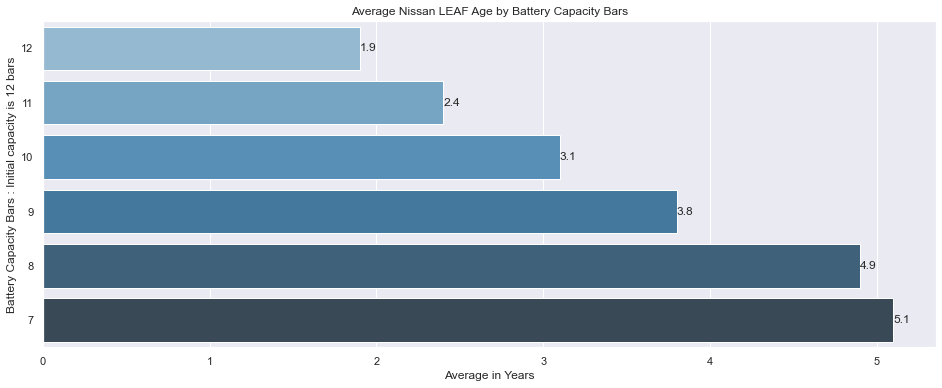

In [128]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='Age (Years)',
            y='Battery Capacity Bars',
            data=bars_age, 
            estimator=sum, 
            ci=None, 
            palette="Blues_d"
            )
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Average in Years')
plt.ylabel('Battery Capacity Bars : Initial capacity is 12 bars')
plt.title('Average Nissan LEAF Age by Battery Capacity Bars');

In [165]:
leaf_bars = pd.merge(bars_miles, bars_age ,on = "Battery Capacity Bars", how = "inner")
leaf_bars

,Battery Capacity Bars,Average Mileage,Age (Years)
0,12,17134,1.9
1,11,25764,2.4
2,10,30539,3.1
3,9,43171,3.8
4,8,54196,4.9
5,7,80771,5.1


In [166]:
leaf_bars.to_csv('../data/leaf_bars.csv', index = False)

### Losing Battery Capacity Bars
####  How fast will the battery lose capacity? It largely depends on the age of the car and the mileage driven, among other factors: 
The analysis shows that Nissan LEAF electric vehicles that have lost one bar and are displaying 11 bars report an average age of 2.4 years and have driven 25,764 miles.
Another bar is lost at an average age of 3.1 years and just about 30,000 miles!
Note: this is not the average age/mileage at the moment when the first bar is lost, but the average stats for owners reporting the state of 11 bars. Vehicles would have been a bit younger and been driven fewer miles when the first bar was lost.

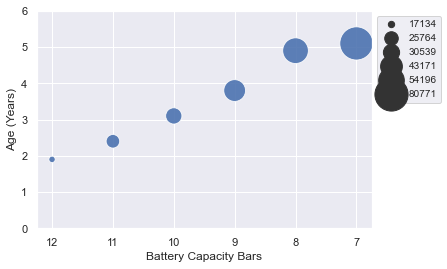

In [180]:
sns.scatterplot(data=leaf_bars, x="Battery Capacity Bars", y="Age (Years)", size="Average Mileage", alpha=0.9, sizes=(40, 1100))
plt.ylim([0,6])
plt.title('Heaviest Gourd by Year');
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10);

### How does range change as capacity bars are lost?

Full original capacity starts at 12 bars and then an approximate 15% loss for the first bar that is lost. 
Thereafter bars represent about 7.5% degradation of the battery pack's original capacity.  

The Nissan LEAF EV originally had a **24 kWh battery pack**, but Nissan has upgraded the LEAF’s battery three times since 2011. 
In 2016, Nissan offered an optional **30 kWh battery** for the LEAF, increasing its driving range from 80 miles to 107 miles of range. Then, in 2018 a **40 kWh lithium-ion battery** was introduced, which has an EPA range rating of 149 miles of range. 
Most recently, in 2019, Nissan added the LEAF e-Plus to the lineup, which has a **62 kWh battery** and 226 miles of range. 
The base LEAF with the 40 kWh battery pack is still available.


In [187]:
data = {'Battery Capacity Bars': [12,11,10,9,8,7],
       'Percent Degradation': [0,15.0,22.5,30.0,37.5,45.0],
       '24kWh Battery Range': [80,68,62,56,50,44],
       '30kWh Battery Range': [107,91,83,75,67,59],
       '40kWh Battery Range': [149,127,115,104,93,82],
       '62kWh Battery Range': [226,192,175,158,141,124]}
leaf_range = pd.DataFrame(data, columns = ['Battery Capacity Bars','Percent Degradation','24kWh Battery Range','30kWh Battery Range','40kWh Battery Range','62kWh Battery Range'])

In [188]:
leaf_range

,Battery Capacity Bars,Percent Degradation,24kWh Battery Range,30kWh Battery Range,40kWh Battery Range,62kWh Battery Range
0,12,0.0,80,107,149,226
1,11,15.0,68,91,127,192
2,10,22.5,62,83,115,175
3,9,30.0,56,75,104,158
4,8,37.5,50,67,93,141
5,7,45.0,44,59,82,124


### Nissan LEAF Capacity Loss Warranty:
#### The Lithium-Ion battery is also warranted against capacity loss below nine bars of capacity as shown on the vehicle’s battery capacity level gauge for a period of 60 months or 60,000 miles, whichever comes first.


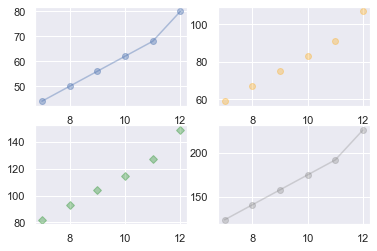

In [191]:
plt.subplot(221)
plt.plot( 'Battery Capacity Bars', '24kWh Battery Range', data=leaf_range, marker='o', alpha=0.4)
plt.subplot(222)
plt.plot( 'Battery Capacity Bars','30kWh Battery Range', data=leaf_range, linestyle='none', marker='o', color="orange", alpha=0.3)
plt.subplot(223)
plt.plot( 'Battery Capacity Bars','40kWh Battery Range', data=leaf_range, linestyle='none', marker='D', color="green", alpha=0.3)
plt.subplot(224)
plt.plot( 'Battery Capacity Bars','62kWh Battery Range', data=leaf_range, marker='o', color="grey", alpha=0.3);

IndexError: index 24 is out of bounds for axis 0 with size 24

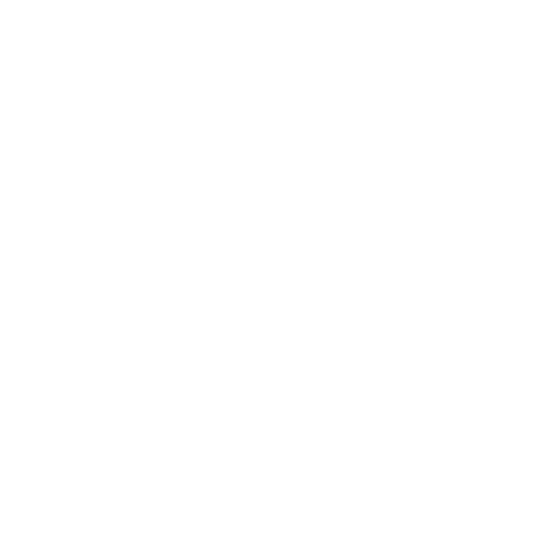

In [203]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        )

VALUES = leaf_range["24kWh Battery Range"].values
LABELS = leaf_range["Percent Degradation"].values
GROUP = leaf_range["Battery Capacity Bars"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [12,11,10,9,8,7]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [12,11,10,9,8,7]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["A", "B", "C", "D"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD